<a href="https://colab.research.google.com/github/f-leno/Aprendizagem-estatistica-regressao/blob/master/Exemplos_de_aprendizagem_de_m%C3%A1quina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercícios de Machine Learning

Todos esses exemplos foram codificados em Python. 

Em geral, exemplos e Provas de Conceito podem ser executados aqui no Google Colab, mas para rodar o código em seu computador é recomendado que você tenha um ambiente gerenciador de pacotes como por exemplo [Anaconda](https://www.anaconda.com/distribution/)

Lembre-se que para treinar algoritmos de Aprendizagem de Máquina precisamos de uma base de treinamento pré-preparada. 

Para gerenciamento de "datasets" utilizaremos o framework [Pandas](https://pandas.pydata.org/).

As bases que consideraremos são a base *Portland* prevendo o preço de uma casa através de seu tamanho e número de quartos e a base *Advertising*  onde o volume de vendas é predito a partir do investimento em diferentes mídias

In [0]:
import pandas as pd

address_base = 'https://github.com/advinstai/Aprendizagem-estatistica-regressao/raw/master/exercicios/Advertising.csv'

dados_adv = pd.read_csv(address_base, index_col=0)
dados_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [0]:
address_base = 'https://github.com/advinstai/Aprendizagem-estatistica-regressao/raw/master/exercicios/Portland_housePrices.csv'

dados_por = pd.read_csv(address_base)
dados_por.head()

,tamanho,quartos,preco
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


Conforme estudamos em aula, utilizamos a base de treinamento para treinar um modelo preditivo

![](https://drive.google.com/file/d/1YoVAoPoFMD2jobfEspmGsQDc94HoLQv3/)

O framework [Scikit-learn](https://scikit-learn.org/stable/) provê diversas implementações de algoritmos de aprendizado e rotinas de pré-processamento necessárias para o desenvolvimento de um projeto de IA.




In [0]:
import sklearn

Antes de treinar os algoritmos, vamos visualizar as bases de dados. Para isso, o framework [matplotlib](https://matplotlib.org/) disponibiliza funções para montar gráficos e representações visuais.

Text(0, 0.5, 'Preço')

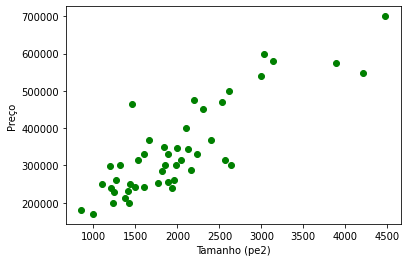

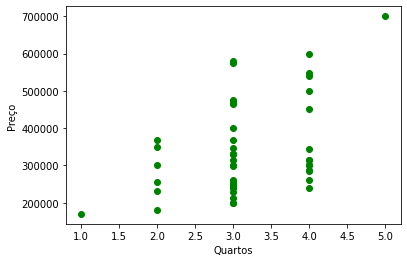

In [0]:
from matplotlib import pyplot as plt

X = dados_por.loc[:,['tamanho']]
y = dados_por.loc[:,['preco']]

plt.scatter(X, y,color='g')
plt.xlabel('Tamanho (pe2)')
plt.ylabel('Preço')

plt.figure()

X = dados_por.loc[:,['quartos']]
y = dados_por.loc[:,['preco']]

plt.scatter(X, y,color='g')
plt.xlabel('Quartos')
plt.ylabel('Preço')

O primeiro algoritmo que vamos explorar é o de [Regressão Linear](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

Para propósitos de visualização, vamos treinar um modelo (uma reta) para cada característica separadamente com o método `fit`.

In [0]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

X = dados_por.loc[:,['tamanho']]
y = dados_por.loc[:,['preco']]

reg = reg.fit(X=X, y=y)

Agora que temos o modelo treinado, o método `predict` pode ser usado para prever o valor de algum ponto.

In [0]:
x = [[4200.]]

reg.predict(x)

array([[636276.70087374]])

Text(0, 0.5, 'Preço')

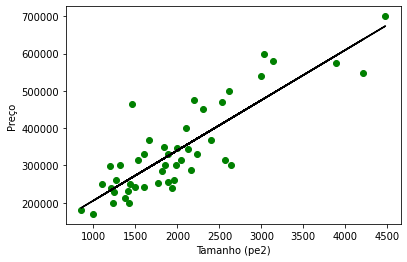

In [0]:
X = dados_por.loc[:,['tamanho']]
y = dados_por.loc[:,['preco']]

plt.scatter(X, y,color='g')
plt.plot(X, reg.predict(X),color='k')
plt.xlabel('Tamanho (pe2)')
plt.ylabel('Preço')

Text(0, 0.5, 'Preço')

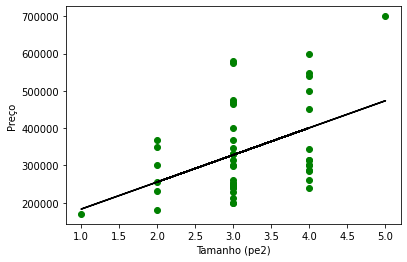

In [0]:
X = dados_por.loc[:,['quartos']]
y = dados_por.loc[:,['preco']]

reg = LinearRegression().fit(X=X, y=y)

plt.scatter(X, y,color='g')
plt.plot(X, reg.predict(X),color='k')
plt.xlabel('Tamanho (pe2)')
plt.ylabel('Preço')

O Principal problema de verificar resultados visualmente é que não conseguimos avaliar mais que três dimensões

Text(0.5, 0, 'quartos')

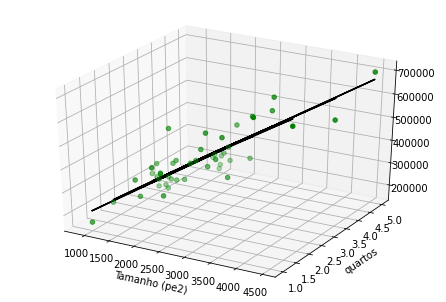

In [0]:
from mpl_toolkits.mplot3d import Axes3D

ax = Axes3D(plt.figure())
X = dados_por.loc[:,['tamanho']]
Z = dados_por.loc[:,['quartos']]
y = dados_por.loc[:,['preco']]

reg = LinearRegression().fit(X=dados_por.loc[:, ['tamanho','quartos']], y=y)

ax.scatter(X, Z, y, color='g')

y_pred = [x[0] for x in reg.predict(dados_por.loc[:, ['tamanho','quartos']])]
ax.plot(X, Z, zs=y_pred, color='k')
#plt.plot(X, reg.predict(X),color='k')
plt.xlabel('Tamanho (pe2)')
plt.ylabel('quartos')


Portanto precisamos de métricas **globais** que codifiquem o quão bom nosso modelo está sendo para classificar os pontos.

O framework que estamos usando já disponibiliza diversas [métricas](https://scikit-learn.org/stable/modules/model_evaluation.html) para isso.

Vamos avaliar o erro médio de nossa base de treinamento (Mean Absolut Error)

In [0]:
from sklearn.metrics import mean_absolute_error

erro_medio = mean_absolute_error(y,y_pred)

print("Erro médio: " +str(erro_medio))
print("Preço Médio: " + str(float(dados_por.loc[:,['preco']].mean())))

Erro médio: 51502.76840573898
Preço Médio: 340412.6595744681


Agora com essas métricas de erro podemos avaliar se um algoritmo de aprendizado está indo bem ou não, mas ainda há um problema que não consideramos, [*overfitting*](https://pt.wikipedia.org/wiki/Sobreajuste)

Podemos amenizar o viés do overfitting em nossa avaliação dividindo a base de treinamento entre "treinamento" e "teste", utilizando a base de treinamento para treinar o algoritmo e a de teste para testá-lo.

Text(0, 0.5, 'Preço')

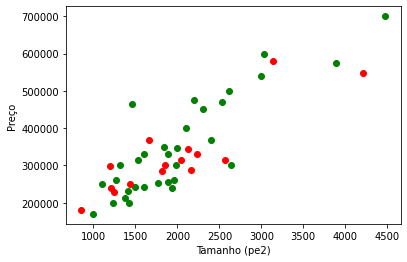

In [0]:
perc_treino = 0.7

index_treino = int(len(dados_por) * perc_treino)

treino_por = dados_por.iloc[:index_treino]
teste_por = dados_por.iloc[index_treino:]

X_train = treino_por.loc[:,['tamanho']]
y_train = treino_por.loc[:,['preco']]
plt.scatter(X_train, y_train,color='g')

X = teste_por.loc[:,['tamanho']]
y = teste_por.loc[:,['preco']]
plt.scatter(X, y,color='r')


plt.xlabel('Tamanho (pe2)')
plt.ylabel('Preço')




Erro Médio:48542.17121481952


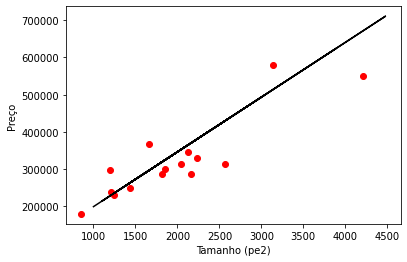

In [0]:
reg = LinearRegression().fit(X=X_train, y=y_train)

plt.scatter(X, y,color='r')
plt.plot( X_train, reg.predict(X_train), color='k')

plt.xlabel('Tamanho (pe2)')
plt.ylabel('Preço')

y_pred = reg.predict(X)
print("Erro Médio:" +str(mean_absolute_error(y,y_pred)))

[Muitos](https://scikit-learn.org/stable/supervised_learning.html) algoritmos de aprendizado implementados pelo framework seguem essa mesma interface do Classificador Linear, o que significa que podemos testar facilmente muitos algoritmos para uma determinada base.

Alguns exemplos de classificadores que voces ja conhecem são:

[Árvore de Decisão](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)


[K-vizinhos mais próximos](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor)

[Rede Neural (Multi-Layer Perceptron)](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html)
